In [2]:
from google.colab import files
uploaded=files.upload()

Saving train_data (2).csv to train_data (2).csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving test_data (1).csv to test_data (1).csv


In [6]:
test=pd.read_csv('test_data (1).csv')

In [7]:
test.head(5)

,Date,Prediction
0,1/1/2019,NaN
1,1/2/2019,NaN
2,1/3/2019,NaN
3,1/4/2019,NaN
4,1/5/2019,NaN


In [8]:
from datetime import datetime, date 
test['Date'] = pd.to_datetime(test['Date'], format = '%m/%d/%Y')

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:

df=pd.read_csv('train_data (2).csv')

In [11]:


df

,Date,Price
0,6/9/2003,74.59
1,6/16/2003,74.47
2,6/23/2003,74.42
3,6/30/2003,74.35
4,7/7/2003,74.28
...,...,...
808,12/3/2018,124.30
809,12/10/2018,122.37
810,12/17/2018,121.02
811,12/24/2018,120.61


In [12]:
df.tail(25)

,Date,Price
788,7/16/2018,127.47
789,7/23/2018,127.50
790,7/30/2018,127.54
791,8/6/2018,128.02
792,8/13/2018,128.39
793,8/20/2018,128.79
794,8/27/2018,129.18
795,9/3/2018,129.76
796,9/10/2018,130.24
797,9/17/2018,130.59


In [13]:
df['Price'] = pd.to_numeric(df['Price'])



In [14]:


df.isnull().sum()

Date     0
Price    2
dtype: int64

In [15]:
df.dtypes

Date      object
Price    float64
dtype: object

In [16]:
df.Price.mean()


110.3304808877927

In [17]:
df['Price'].fillna(value=df.Price.mean(),inplace=True)

In [18]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [19]:
from datetime import datetime, date 
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')

In [20]:
data=df.set_index('Date')


In [21]:
data.head()

,Price
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28


In [22]:
data.dtypes


Price    float64
dtype: object

In [23]:
data['Price'] = pd.to_numeric(data['Price'])

Text(0.5, 1.0, 'PETROL PRICE FROM 6/9/2003 TO 12/31/2018\t')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


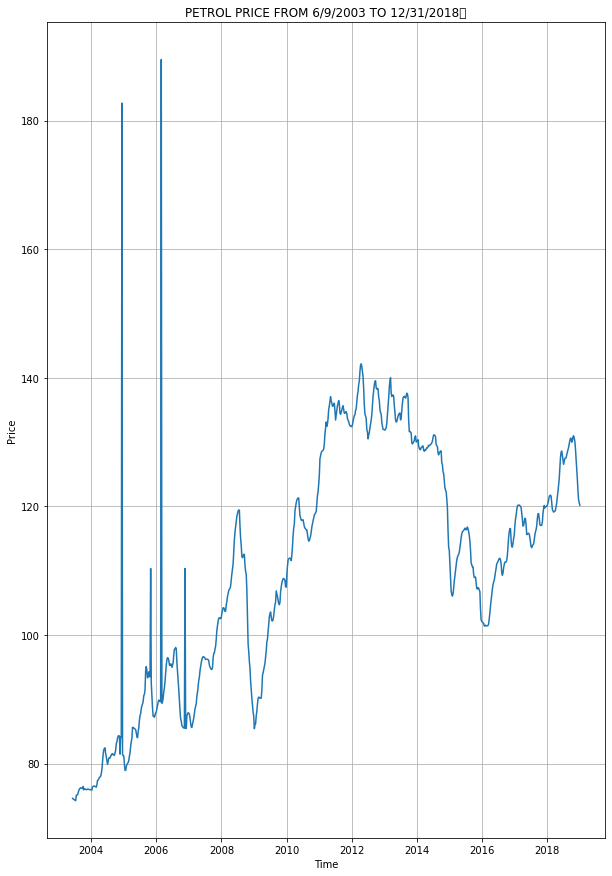

In [24]:
plt.figure(figsize=(10,15))
plt.grid(True)
#plt.plot(p1)
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("PETROL PRICE FROM 6/9/2003 TO 12/31/2018	")

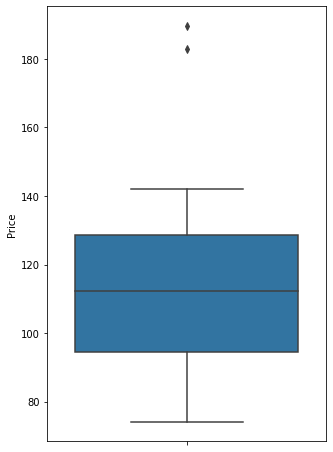

In [25]:
plt.figure(figsize=(5,8))
sns.boxplot(y=data['Price'])

Text(0.5, 1.0, 'PETROL PRICE FROM 6/9/2003 TO 12/31/2018\t')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


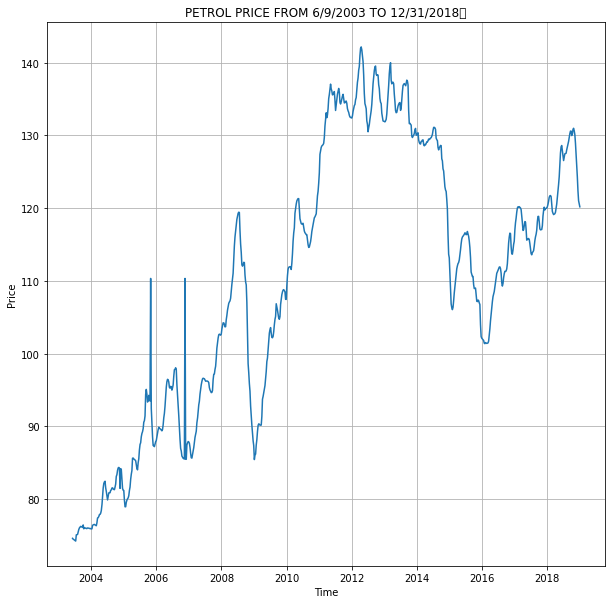

In [26]:
q1=data['Price'].quantile(0.25)
q2=data['Price'].quantile(0.75)
iqr=q2-q1
filter = (data['Price'] >= q1 - 1.5 * iqr) & (data['Price'] <= q2+ 1.5 *iqr)
data=data.loc[filter]
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data)
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("PETROL PRICE FROM 6/9/2003 TO 12/31/2018	")

In [27]:
data.info

<bound method DataFrame.info of              Price
Date              
2003-06-09   74.59
2003-06-16   74.47
2003-06-23   74.42
2003-06-30   74.35
2003-07-07   74.28
...            ...
2018-12-03  124.30
2018-12-10  122.37
2018-12-17  121.02
2018-12-24  120.61
2018-12-31  120.18

[811 rows x 1 columns]>

In [28]:
rm=data.rolling(window=12).mean()
rstd=data.rolling(window=12).std()
print(rm,rstd)




                 Price
Date                  
2003-06-09         NaN
2003-06-16         NaN
2003-06-23         NaN
2003-06-30         NaN
2003-07-07         NaN
...                ...
2018-12-03  129.188333
2018-12-10  128.503333
2018-12-17  127.705833
2018-12-24  126.925000
2018-12-31  126.094167

[811 rows x 1 columns]                Price
Date                
2003-06-09       NaN
2003-06-16       NaN
2003-06-23       NaN
2003-06-30       NaN
2003-07-07       NaN
...              ...
2018-12-03  2.197481
2018-12-10  2.892191
2018-12-17  3.516539
2018-12-24  3.975940
2018-12-31  4.271471

[811 rows x 1 columns]


In [29]:
rm.head(20)

,Price
Date,
2003-06-09,NaN
2003-06-16,NaN
2003-06-23,NaN
2003-06-30,NaN
2003-07-07,NaN
2003-07-14,NaN
2003-07-21,NaN
2003-07-28,NaN
2003-08-04,NaN


In [30]:
rstd.head(15)

,Price
Date,
2003-06-09,NaN
2003-06-16,NaN
2003-06-23,NaN
2003-06-30,NaN
2003-07-07,NaN
2003-07-14,NaN
2003-07-21,NaN
2003-07-28,NaN
2003-08-04,NaN


In [31]:
data.head(20)

,Price
Date,
2003-06-09,74.59
2003-06-16,74.47
2003-06-23,74.42
2003-06-30,74.35
2003-07-07,74.28
2003-07-14,74.21
2003-07-21,75.07
2003-07-28,75.10
2003-08-04,75.12


Text(0.5, 1.0, 'original plot vs prediction using rolling mean')

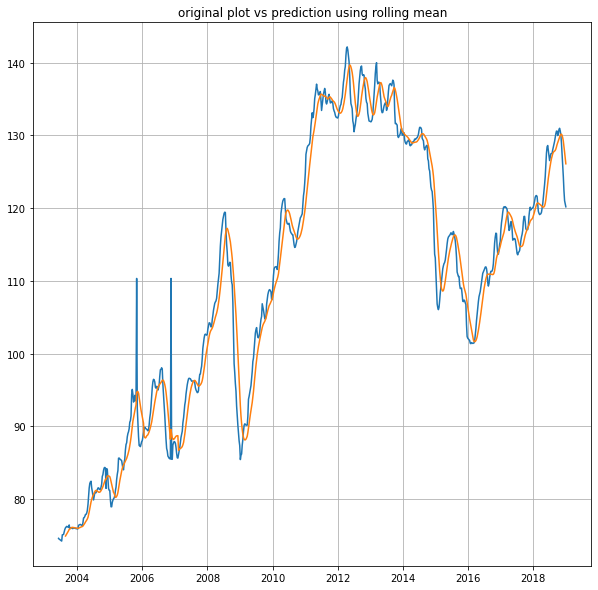

In [32]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(data,label='original')
plt.plot(rm,label='rm')
plt.title("original plot vs prediction using rolling mean")


In [33]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data["Price"])
print("ADF Statistic: %f" %result[0])
print("p-value: %f" %result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t%s: %.3f" %(key, value))

if result[0] < result[4]["5%"]:
    print("At 5% level of significance - Reject H0 - Time series is stationary")
else:
    print("At 5% level of significance - Failed to reject H0 - Time series is non-stationary")

ADF Statistic: -2.028630
p-value: 0.274163
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
At 5% level of significance - Failed to reject H0 - Time series is non-stationary


In [35]:
data["Price first difference"] = data["Price"] - data["Price"].shift(1)
data["Price seasonal difference"] = data["Price"] - data["Price"].shift(12)

#Dickey Fuller Test
result1 = adfuller(data["Price first difference"].dropna())
print("ADF Statistic: %f" %result1[0])
print("p-value: %f" %result1[1])
print("Critical Values:")
for key, value in result1[4].items():
    print("\t%s: %.3f" %(key, value))

if result1[0] < result1[4]["5%"]:
    print("At 5% level of significance - Reject H0 - Time series is stationary")
else:
    print("At 5% level of significance - Failed to reject H0 - Time series is non-stationary")

ADF Statistic: -10.569892
p-value: 0.000000
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
At 5% level of significance - Reject H0 - Time series is stationary


In [36]:
data.head(5)

,Price,Price first difference,Price seasonal difference
Date,,,
2003-06-09,74.59,NaN,NaN
2003-06-16,74.47,-0.12,NaN
2003-06-23,74.42,-0.05,NaN
2003-06-30,74.35,-0.07,NaN
2003-07-07,74.28,-0.07,NaN


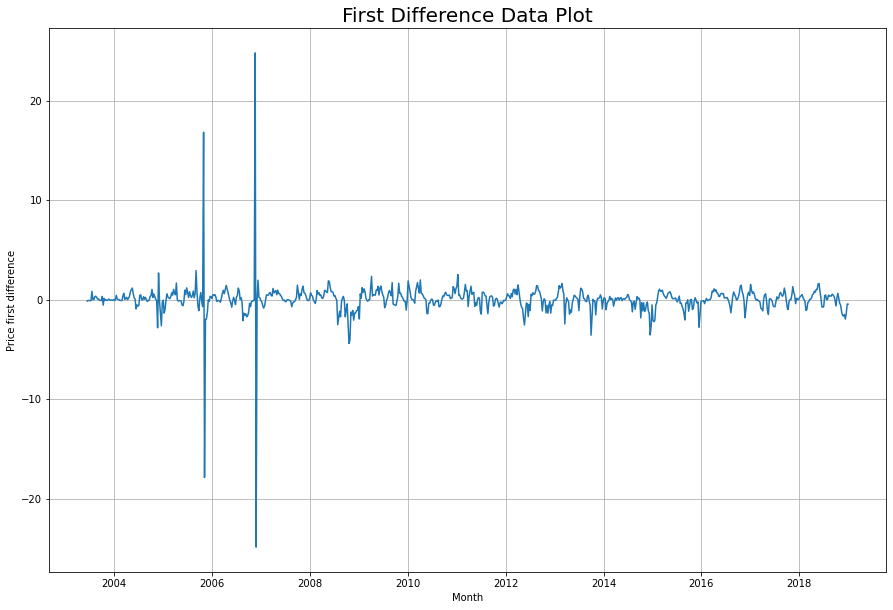

In [37]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.xlabel("Month")
plt.ylabel("Price first difference")
plt.title("First Difference Data Plot", size = 20)
plt.plot(data["Price first difference"])

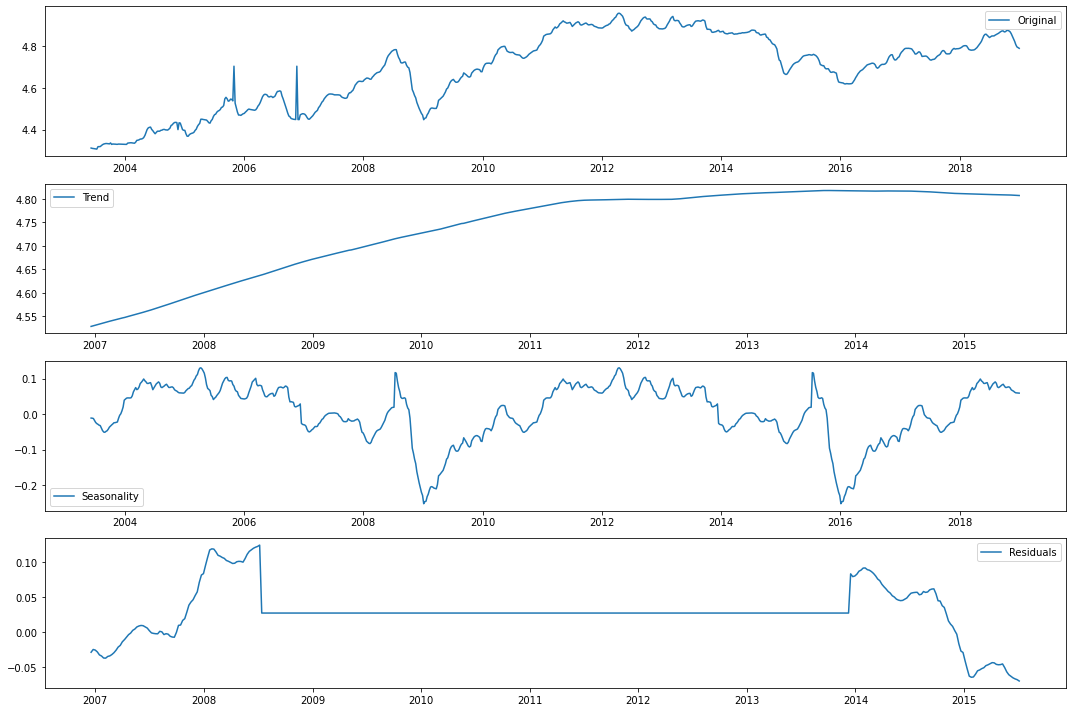

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_log = np.log(data['Price'])

decomposition = seasonal_decompose(ts_log, freq = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,10))
plt.grid(True)
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


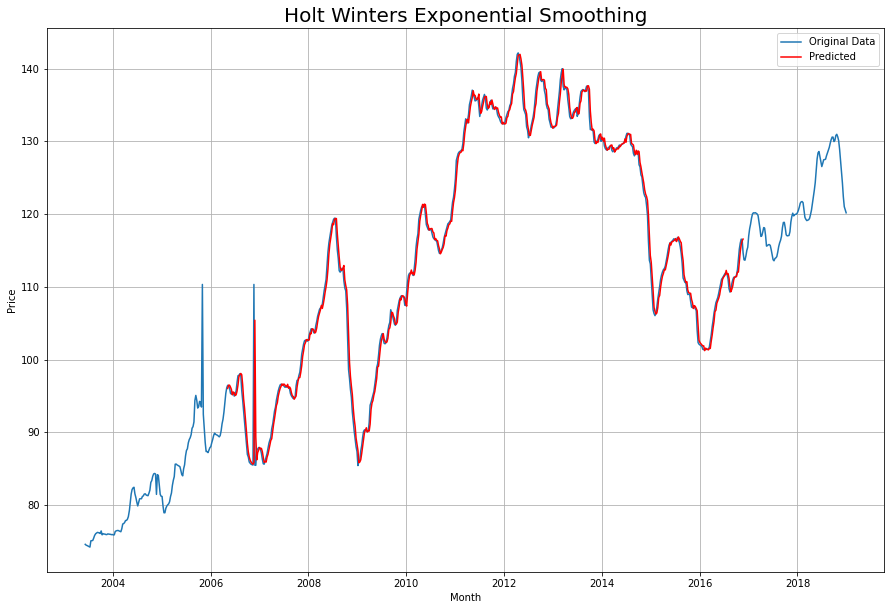

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(data["Price"], trend = "mul", seasonal = "mul", seasonal_periods = 12)
fit = model.fit()
pred = fit.predict(start = 150, end = 700)

plt.figure(figsize=(15,10))
plt.plot(data["Price"], label = "Original Data")
plt.plot(pred, label = "Predicted", color = "red")
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("Holt Winters Exponential Smoothing", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [43]:
import statsmodels.api as sm


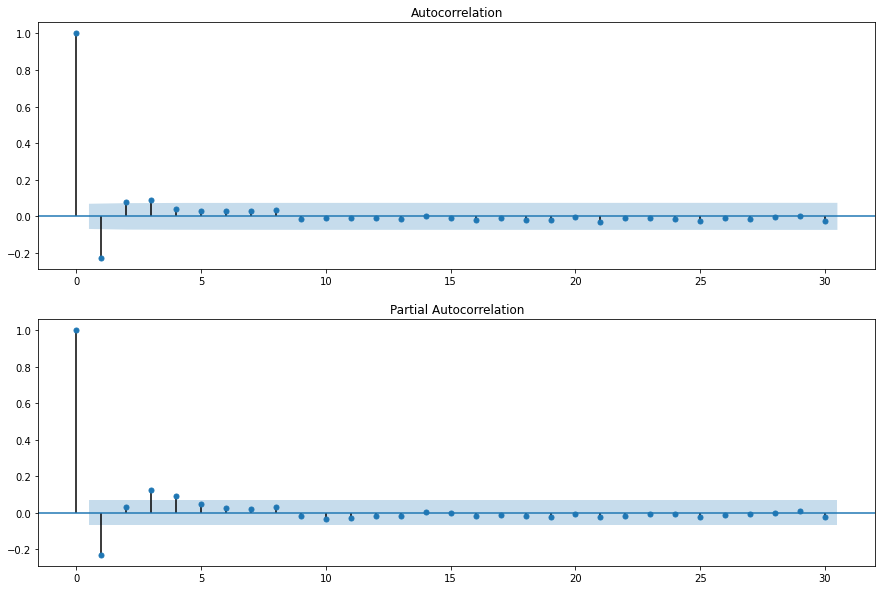

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize = (15,10))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data["Price first difference"].dropna(), ax = ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data["Price first difference"].dropna(), ax = ax2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


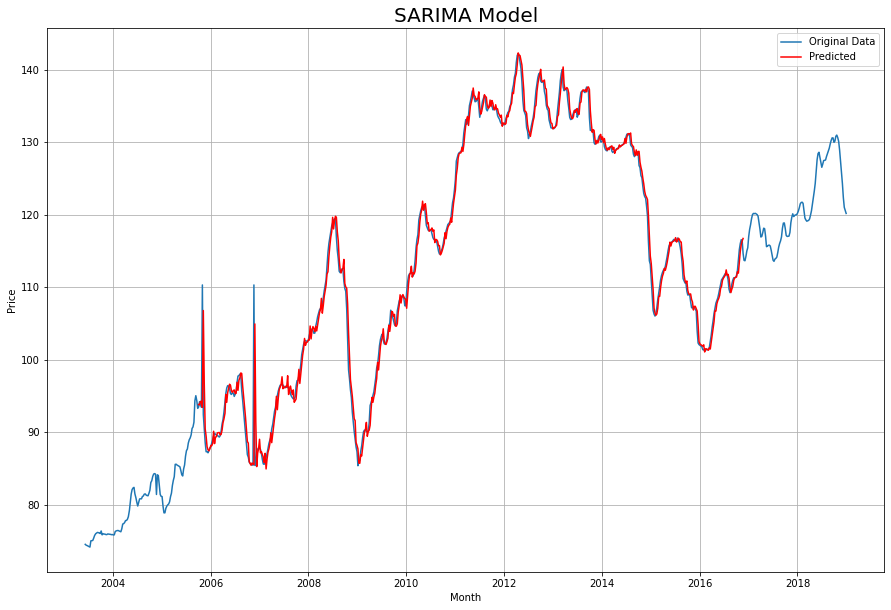

In [47]:
import statsmodels.api as sm

model1 = sm.tsa.statespace.SARIMAX(data["Price"], order = (1,1,1), seasonal_order = (1,1,1,12))
fit1 = model1.fit()
pred1 = fit1.predict(start = 120, end = 700)

plt.figure(figsize=(15,10))
plt.plot(data["Price"], label = "Original Data")
plt.plot(pred1, label = "Predicted", color = "red")
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("SARIMA Model", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [49]:
data_train, data_test, data_train, data_test = train_test_split(df['Date''],df['Price'], test_size=0.33)

SyntaxError: ignored

In [48]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test["Price"],pred1))

KeyError: ignored

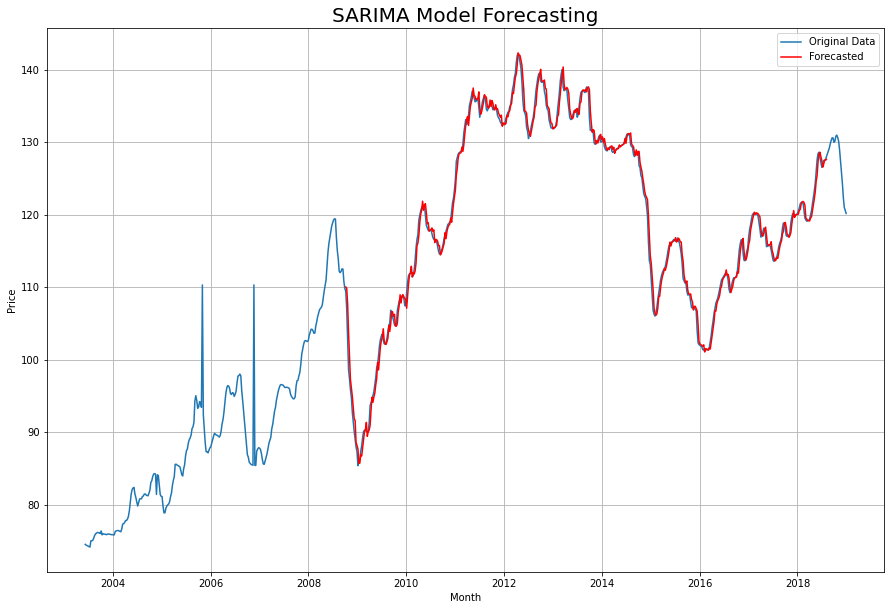

In [51]:
forecast = fit1.predict(start = 276, end = 789)

plt.figure(figsize=(15,10))
plt.plot(data["Price"], label = "Original Data")
plt.plot(forecast, label = "Forecasted", color = "red")
plt.xlabel("Month")
plt.ylabel("Price")
plt.title("SARIMA Model Forecasting", size = 20)
plt.legend(loc="best")
plt.grid(True)
plt.show()


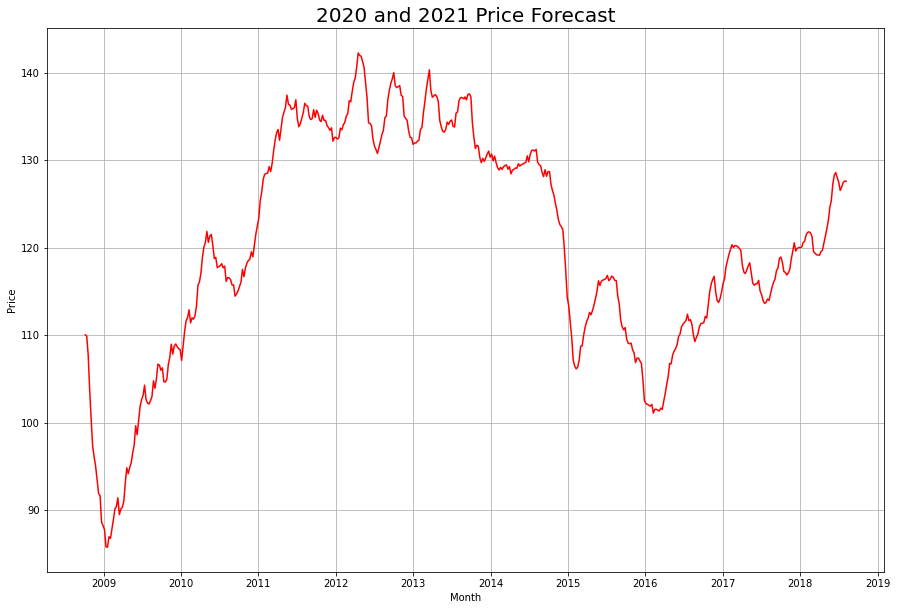

In [52]:
plt.figure(figsize = (15,10))
plt.plot(forecast, color = "red")
plt.title("2020 and 2021 Price Forecast", size = 20)
plt.xlabel("Month")
plt.ylabel("Price")
plt.grid(True)

In [53]:
forecast_20_21 = pd.DataFrame(forecast, columns = ["Forecasted Price"])
forecast_20_21

,Forecasted Price
Date,
2008-10-06,110.050247
2008-10-13,109.896052
2008-10-20,107.701997
2008-10-27,103.693184
2008-11-03,100.355654
...,...
2018-07-09,126.558241
2018-07-16,126.964059
2018-07-23,127.492655
